In [107]:
# MODEL TUNING
# PERFORMANCE MEASURE - PERFORMANCE MEASURE
# BIAS VARIANCE TRADE_OFF

# OVER FITTING
# UNDER FITTING
# OPTIMIZATION TECHNIQQUES


In [101]:
# Performance Metrics
# Confusion matrix
# Precision
# Recall
# Accuracy
# F1 score

# https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec14/performance-metrics

In [103]:
# Data Manupulation
# DUMMY VARIABLE DISCUSSION LATER
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
#print(df.head(5)) 
dfInput = df.iloc[:,1:7] # 0  is not required
dfoutput = df.iloc[:,-1]

split = int(0.8*len(df))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

model = LogisticRegression()
from sklearn import preprocessing
from sklearn import utils
# .MultiLabelBinarizer()  LabelEncoder LabelBinarizer
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
#print(encoded)
model = model.fit(X_train,encoded)

print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))



Confusion Matrix
[[88 11]
 [28 27]]


In [104]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(Y_test, predicted, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.711


In [105]:
from sklearn.metrics import recall_score
# calculate recall
recall = recall_score(Y_test, predicted, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.491


In [106]:
from sklearn.metrics import f1_score
# calculate score
score = f1_score(Y_test, predicted, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.581


In [2]:
#  CROSS VALIDATION

# GRID SEARCH

In [3]:
#https://medium.com/@sebastiannorena/some-model-tuning-methods-bfef3e6544f0

In [6]:
#In order to avoid manually setting different percentages for training and testing sets, 
#you can give this task to the cross_validate function, which will divide the training set into k folds 
#and then try the different combinations where each of the combinations will use a different fold as the test set and 
#the remaining k-1 folds as the train set. 
#k is the desired number of folds, I have seen it usually works well with k=5.

In [40]:
#A few common methods used for cross validation
#The Validation set Approach
#Leave out one cross validation (LOOCV)
#k-fold cross validation
#Stratified k-fold cross validation
#Adversarial validation
#Cross validation for time series
#Custom cross validation techniques

In [50]:
from sklearn.model_selection import KFold 
import numpy as np
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   

TRAIN: [0 1] TEST: [2 3]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 2] TEST: [0 3]
TRAIN: [0 3] TEST: [1 2]


In [55]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


<AxesSubplot:title={'center':'Modal Coefficients'}>

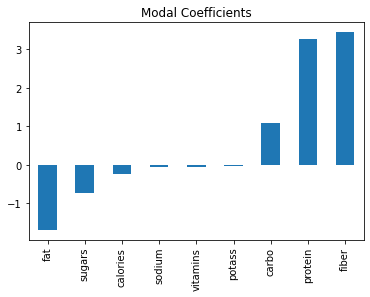

In [81]:
#checking the magnitude of coefficients

import pandas as pd
from pandas import Series, DataFrame
# Plotting graphs
import matplotlib.pyplot as plt
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()

#lreg = LogisticRegression()
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
# cerealspga05.csv  - diabetes.csv
X = df.iloc[:,3:12] # 0  is not required
Y = df.iloc[:,-1]
df.head(5)

split = int(0.8*len(df))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

lreg.fit(X_train,Y_train)
#print(lreg)

predictors = X_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

#We can see that coefficients of FAT and FIBER
#is much higher as compared to rest of the coefficients. 
#Therefore the total RATING of an item would be more driven by these two features.

In [84]:
# Ridge Regression
# Lasso REgression
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,Y_train)
pred = ridgeReg.predict(X_test)
pred.mean()


47.737221545498905

In [85]:
#LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge, 
#but lets understand the difference them by implementing it in our big mart problem.

from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,Y_train)
pred = lassoReg.predict(X_test)
pred.mean()

44.99474537624702

# model’s bias-variance

After k-fold cross validation, we’ll get k different model estimation errors (e1, e2 …..ek). In an ideal scenario, these error values should sum up to zero. To return the model’s bias, we take the average of all the errors. Lower the average value, better the model.

Similarly for calculating the model variance, we take standard deviation of all the errors. A low value of standard deviation suggests our model does not vary a lot with different subsets of training data.

We should focus on achieving a balance between bias and variance. This can be done by reducing the variance and controlling bias to an extent. It’ll result in a better predictive model. This trade-off usually leads to building less complex predictive models as well.

In [41]:
# https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

# OVERFITTING

# UNDER FITTING

In [38]:
# MODEL PARAMETRS< HYPER PARAMETERS
# REGULARIZATION
# regularization, Penalty, L1, L2
# GridSearchCV
# warnings

In [23]:
#Model parameters are the values that get defined 
#after doing some training on a dataset, and are defined directly according to the data.

In [24]:
#The coefficients on a logistic regression or linear regression model
#The weights in a neural network

#Model hyper-parameters are values that get defined before training a dataset and can not be learned directly 
#from the data. Hyper-parameters are defined for the model at a higher level so the model
#can be train on the data set according to them and then determine the model parameters.

#The learning rate of the model
#The number of folds on a k-fold cross validation

In [26]:
# Data Manupulation
# DUMMY VARIABLE DISCUSSION LATER
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
#print(df.head(5)) 

In [52]:
dfInput = df.iloc[:,1:7] # 0  is not required
dfoutput = df.iloc[:,-1]
X = dfInput
Y = dfoutput

In [ ]:
#Penalty Terms
#Regularization works by biasing data towards particular values (such as small values near zero). 
#The bias is achieved by adding a tuning parameter to encourage those values:

#L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. 
#In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients); 
#Some coefficients can become zero and eliminated. Lasso regression uses this method.

#L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients.
#L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated).
#Ridge regression and SVMs use this method.
#Elastic nets combine L1 & L2 methods, but do add a hyperparameter (see this paper by Zou and Hastie).

In [35]:
#What is Regularization?
#Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. 
#In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined,
#more parsimonious model will likely perform better at predictions. Regularization adds penalties 
#to more complex models and then sorts potential models from least overfit to greatest; 
#The model with the lowest “overfitting” score is usually the best choice for predictive power.

In [54]:
# Create logistic regression object
import warnings
warnings.filterwarnings("ignore")


logistic = LogisticRegression()
from sklearn.model_selection import GridSearchCV
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'
penalty = ['l1', 'l2']
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'
C = [0.0001, 0.001, 0.01, 1, 100,0.05, 0.1]
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict(C=C, penalty=penalty)
# Fit your model using gridsearch
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=1)
best_model = clf.fit(X, Y)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)
# You can also print the best penalty and C value individually from best_model.best_estimator_.get_params()
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters {'C': 1, 'penalty': 'l2'}
Best Penalty: l2
Best C: 1


In [86]:
# PYTHON UNDERFITTING VS OVERFITTING

Automatically created module for IPython interactive environment


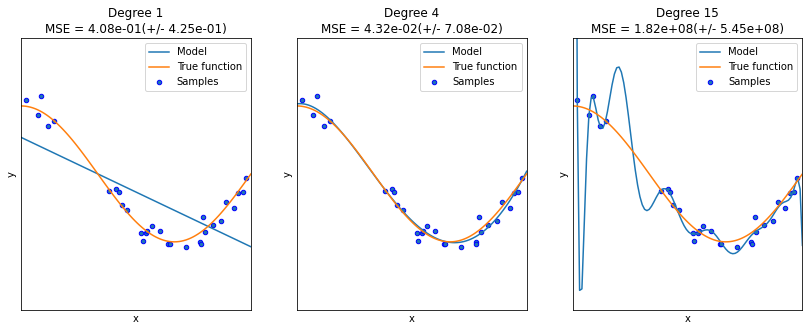

In [87]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [89]:
# BIAS VARIANCE TRADE_OFF

# low bias and low variance

#The performance of the model on the task can be described in 
#terms of the prediction error on all examples not used to train the model. We will refer to this as the model error.

#Error(Model)

#The model error can be decomposed into three sources of error: 
#    the variance of the model, the bias of the model, and the variance of the irreducible error in the data.

#Error(Model) = Variance(Model) + Bias(Model) + Variance(Irreducible Error)

In [90]:
#Low Bias: Weak assumptions regarding the functional form of the mapping of inputs to outputs.
#High Bias: Strong assumptions regarding the functional form of the mapping of inputs to outputs.

In [91]:
#Low Variance: Small changes to the model with changes to the training dataset.
#High Variance: Large changes to the model with changes to the training dataset.

In [93]:

# A model with high variance will change a lot with small changes to the training dataset.

# Model Error = Reducible Error + Irreducible Error

#The error is caused by elements outside our control, such as statistical noise in the observations

In [94]:
# Bias-Variance Trade-off

In [95]:
#We cannot calculate the actual bias and variance for a predictive modeling problem.

#This is because we do not know the true mapping function for a predictive modeling problem.

In [96]:
#The mlxtend library by Sebastian Raschka provides the bias_variance_decomp() function 
#that can estimate the bias and variance for a model over multiple bootstrap samples.

In [100]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
'''
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
'''

df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
# DF is not suitable
data = df.values
X, Y = data[:, 4:10], data[:, -1]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 20.048
Bias: 19.422
Variance: 0.626


In [108]:
# OPTIMIZATION TECHNIQQUES

# Understand Data
# Proper use of FOR Loop, LIST COMPREHEMSIONS
#  simple split, Train test split, Cross Validation or our own tech
# Built in Module, Function, use first.

# Functions - REUSE

# SMaller sample - upto 5000 Records
# Diversified data
# stratified data

# FEATURE EXTRACTION / ENGINEERING